In [10]:
import numpy as np
import os
import sys
from alphastable import *
import matplotlib.pyplot as plt

from scipy.stats import kde

In [11]:
sigma = 1
d = 2
N = 1000
alpha = 1.1
beta = 1
gamma = np.cos((np.pi * alpha) / 4) ** (2/alpha)
delta = 0
G = np.random.normal(0, sigma, size=[N, d])
A = alphastable(N, 1, alpha/2, beta, gamma, delta, 1)
X = np.sqrt(A) * G

In [15]:
n = 30
E = np.arange(0, 2*np.pi, np.pi / n)
R = np.arange(10, 60, 10)
Gamma = np.ones((len(E), len(R)))
Gamma[:] = numpy.nan

for k in range(len(E)):
    e = E[k]
    for j in range(len(R)):
        r = R[j]
        counter_1 = 0
        counter_2 = 0
        for i in range(len(X)):
            if np.arctan2(X[i][0], X[i][1]) < e and np.linalg.norm(X[i]) > r:
                counter_1 += 1
            if np.linalg.norm(X[i]) > r:
                counter_2 += 1
        if counter_2 != 0:
            Gamma[k, j] = counter_1 / counter_2


C:\Users\andrz\AppData\Local\Temp\ipykernel_8500\1299893559.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pc = ax.pcolormesh(A, R, hist.T, cmap="magma_r")


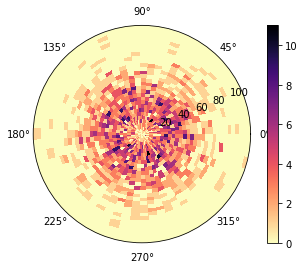

In [25]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt

# two input arrays
azimut = np.random.rand(3000)*2*np.pi
radius = np.random.rayleigh(29, size=3000)

# define binning
rbins = np.linspace(0,radius.max(), 30)
abins = np.linspace(0,2*np.pi, 60)

#calculate histogram
hist, _, _ = np.histogram2d(azimut, radius, bins=(abins, rbins))
A, R = np.meshgrid(abins, rbins)

# plot
fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))

pc = ax.pcolormesh(A, R, hist.T, cmap="magma_r")
fig.colorbar(pc)

plt.show()

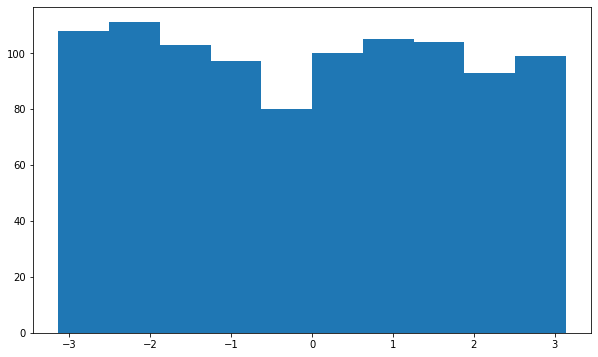

In [24]:
fig, ax = plt.subplots(figsize = (10, 0.6 * 10))
Points_angles = np.ones(N)
for i, val in enumerate(X):
    Points_angles[i] = np.arctan2(X[i][0], X[i][1])
ax.hist(Points_angles);

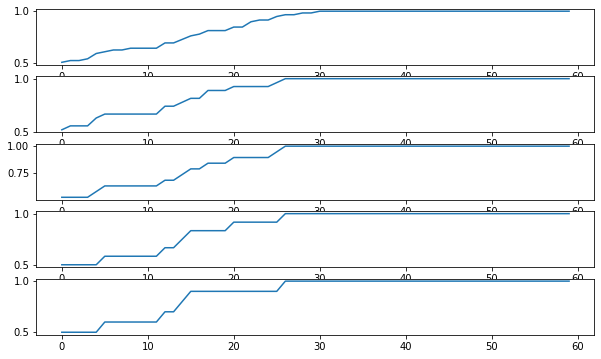

In [17]:
fig, ax = plt.subplots(nrows = len(R), figsize = (10, 0.6 * 10))
for i in range(len(R)):
    ax[i].plot(Gamma[:, i])